In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sn

In [25]:
from google.colab import files
uploaded = files.upload()

Saving medical.csv to medical.csv


In [26]:
df = pd.read_csv('/content/medical.csv')
df.head()

,Blood Pressure,Age,Weight,Cholesterol
0,78,58,76,153
1,91,48,70,234
2,79,34,52,195
3,93,62,99,190
4,85,27,62,243


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Blood Pressure  30 non-null     int64
 1   Age             30 non-null     int64
 2   Weight          30 non-null     int64
 3   Cholesterol     30 non-null     int64
dtypes: int64(4)
memory usage: 1.1 KB


In [28]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Blood Pressure    0
Age               0
Weight            0
Cholesterol       0
dtype: int64


In [29]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [30]:
df['has_disease'] = (df['cholesterol'] > 200).astype(int)
X = df[['blood_pressure', 'age', 'weight', 'cholesterol']]
y = df['has_disease']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[2 0]
 [1 3]]


<Axes: xlabel='Predicted', ylabel='Actual'>

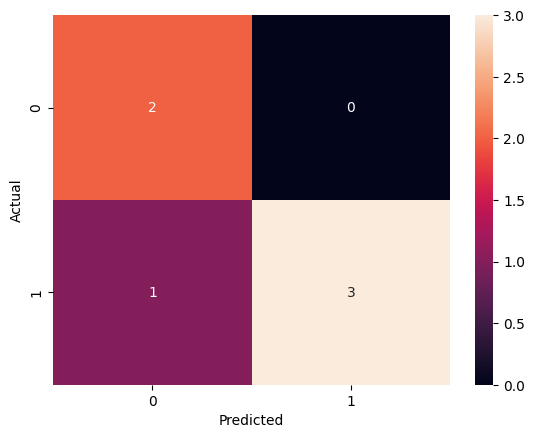

In [37]:
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)